In [1]:
import os
import json
import random

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import collections  as mc
from sklearn.cluster import KMeans

random.seed(1337)
random_state = 451
np.random.seed(42)

In [2]:
def data_from_file(file):
    """Read json sequence data"""
    with open(file) as f:
        data = np.array(json.load(f))
    return data

In [3]:
n_clusters = 16
data = data_from_file('./files/json/sequence3.json')

# Show examples of data
print(data)

[[[0.46392624 0.26740089]
  [0.44737112 0.24449598]]

 [[0.46968451 0.28602172]
  [0.4477959  0.24509691]]

 [[0.46618529 0.27498461]
  [0.35723804 0.22402391]]

 ...

 [[0.         0.        ]
  [0.45029024 0.28307711]]

 [[0.         0.        ]
  [0.45988326 0.26462245]]

 [[0.         0.        ]
  [0.4636145  0.27102804]]]


In [4]:
sequence1 = data[:,0]
sequence2 = data[:,1]

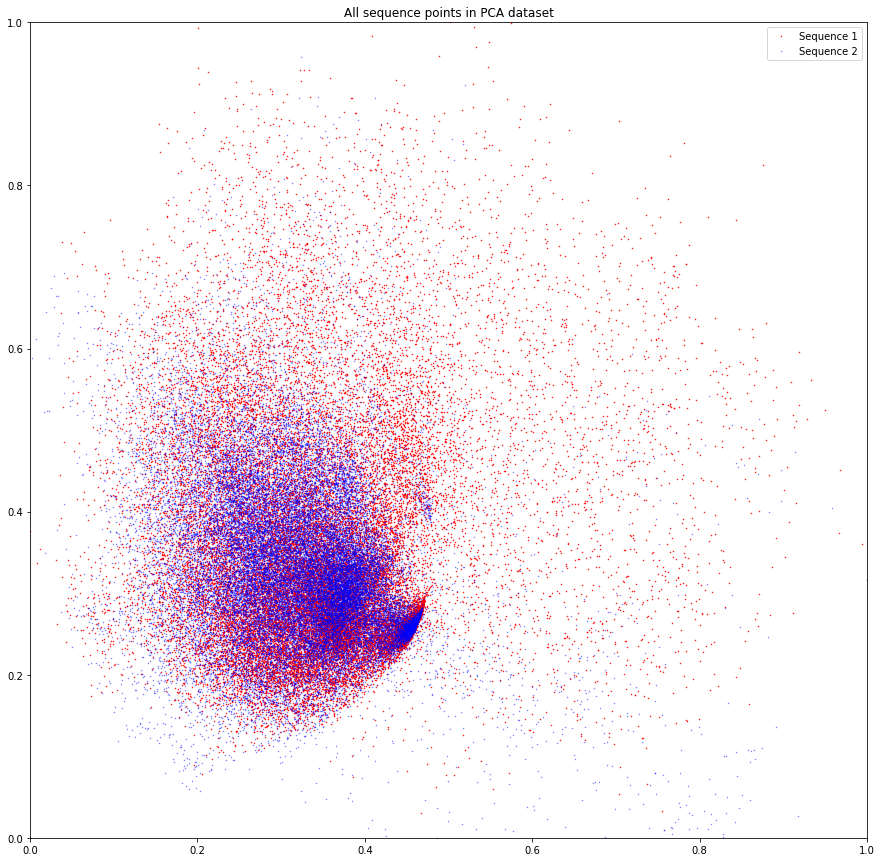

In [5]:
# Plot PCA space
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('All sequence points in PCA dataset')
ax.axis([0.0, 1.0, 0.0, 1.0])

ax.plot(sequence1[:,0], sequence1[:,1], 'ro', label='Sequence 1', markersize=0.5, alpha=1)
ax.plot(sequence2[:,0], sequence2[:,1], 'bo', label='Sequence 2', markersize=0.5, alpha=0.5)

ax.legend()
plt.show()

In [6]:
# K-means clustering
kmeans = KMeans(n_clusters=n_clusters,
                random_state=random_state).fit(sequence1)

prediction1 = kmeans.predict(sequence1)
prediction2 = kmeans.predict(sequence2)

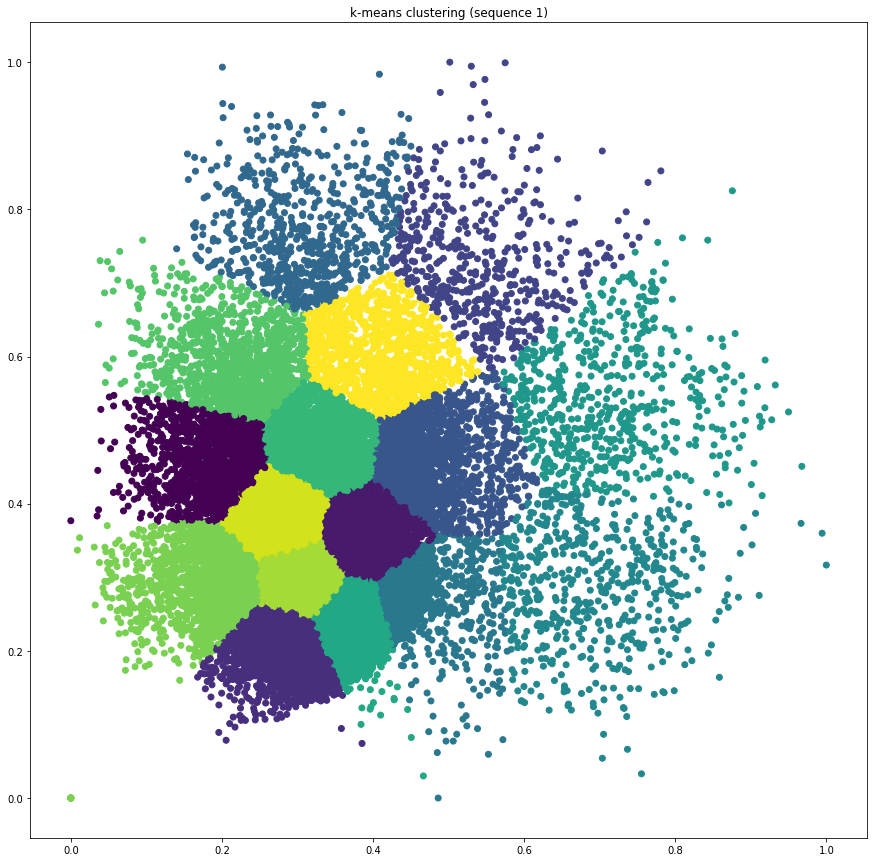

In [12]:
# Plot results
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('k-means clustering (sequence 1)')
ax.scatter(sequence1[:, 0], sequence1[:, 1], c=prediction1)

plt.show()

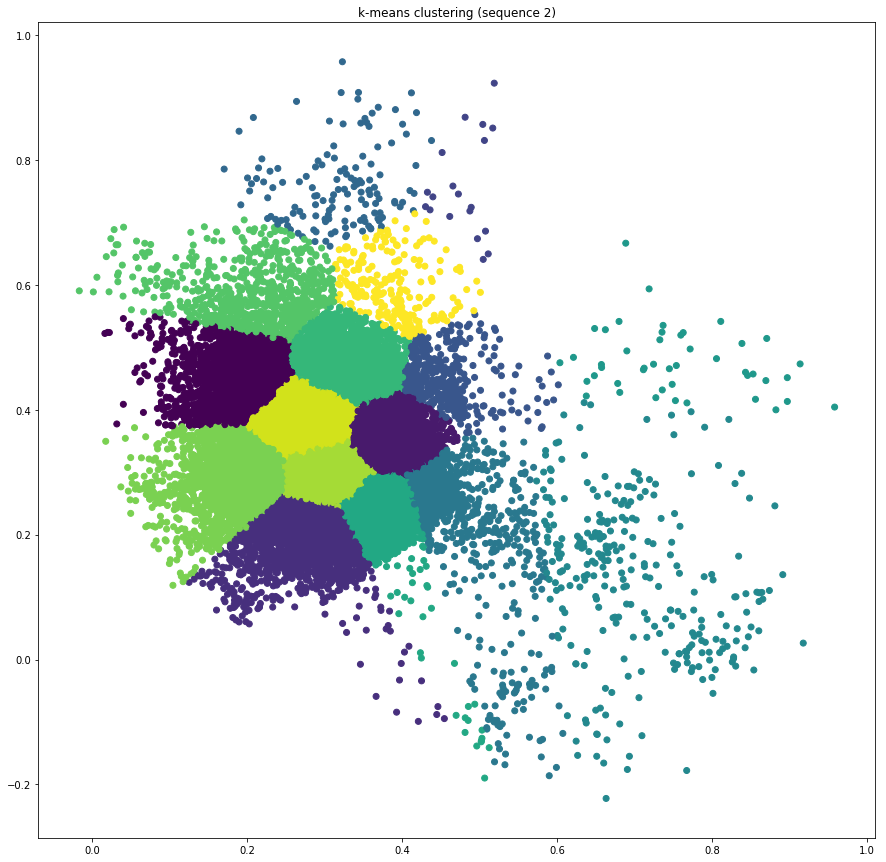

In [8]:
# Plot results for sequence 2
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('k-means clustering (sequence 2)')
ax.scatter(sequence2[:, 0], sequence2[:, 1], c=prediction2)
plt.show()

In [9]:
print(prediction2)

[6 6 9 ... 6 6 6]


In [10]:
print(prediction1)

[ 6  6  6 ... 12 12 12]
